# Airbnb Prices in European Cities Prediction
______________________________________________________________________________________________________________________

## Introduction
<p>This dataset provides a comprehensive look at Airbnb prices in some of the most popular European cities. Each listing is evaluated for various attributes such as room types, cleanliness and satisfaction ratings, bedrooms, distance from the city centre, and more to capture an in-depth understanding of Airbnb prices on both weekdays and weekends.
In this project we goint to analyze this data and develop a model that help us to predict the proces of the room/apartment of the Airbnb.</p>

## Source

Datasets: https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities


## Objective

<p>Analyze the data and based on the analysis build a linear regression model that help to predict the price</p>


In [230]:
import pandas as pd # data manipulation
import numpy as np #  multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

### import the data

In [231]:
def df_creation(file):
    return pd.read_csv(file, sep=';')

In [232]:
df_amsterdam_weekdays = df_creation('amsterdam_weekdays_added.csv')
df_amsterdam_weekdends = df_creation('amsterdam_weekend_added.csv')

df_athens_weekdays = df_creation('athens_weekdays_added.csv')
df_athens_weekdends = df_creation('athens_weekends_added.csv')

df_barcelona_weekdays = df_creation('barcelona_weekdays_added.csv')
df_barcelona_weekdends = df_creation('barcelona_weekends_added.csv')

df_berlin_weekdays = df_creation('berlin_weekdays_added.csv')
df_berlin_weekdends = df_creation('berlin_weekends_added.csv')

df_budapest_weekdays = df_creation('budapest_weekdays_added.csv')
df_budapest_weekdends = df_creation('budapest_weekends_added.csv')

df_lisbon_weekdays = df_creation('lisbon_weekday_added.csv')
df_lisbon_weekdends = df_creation('lisbon_weekends_added.csv')

df_london_weekdays = df_creation('london_weekdays_added.csv')
df_london_weekdends = df_creation('london_weekends_added.csv')

df_paris_weekdays  = df_creation('paris_weekdays_added.csv')
df_paris_weekdends  = df_creation('paris_weekends_added.csv')

df_rome_weekdays = df_creation('rome_weekday_added.csv')
df_rome_weekdends = df_creation('rome_weekends_added.csv')

df_vienna_weekdays = df_creation('vienna_weekdays_added.csv')
df_vienna_weekdends = df_creation('vienna_weekends_added.csv')

In [233]:
df_amsterdam_weekdays

,Column1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekday
0,0,194.033698,Private room,FALSO,VERDADERO,2,FALSO,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,1
1,1,344.245776,Private room,FALSO,VERDADERO,4,FALSO,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,1
2,2,264.101422,Private room,FALSO,VERDADERO,2,FALSO,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,1
3,3,433.529398,Private room,FALSO,VERDADERO,4,FALSO,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,1
4,4,485.552926,Private room,FALSO,VERDADERO,2,VERDADERO,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,FALSO,FALSO,2,FALSO,0,0,10,100,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677,amsterdam,1
1099,1099,233.637194,Private room,FALSO,VERDADERO,2,FALSO,1,0,10,90,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910,amsterdam,1
1100,1100,317.062311,Private room,FALSO,VERDADERO,2,FALSO,1,0,10,92,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798,amsterdam,1
1101,1101,1812.855904,Entire home/apt,FALSO,FALSO,4,FALSO,0,0,8,84,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794,amsterdam,1


Lets make sure each dataframe has the same amount of column so we can concat them

In [234]:
print(df_amsterdam_weekdays.shape)
print(df_amsterdam_weekdends.shape)

print(' ')

print(df_athens_weekdays.shape)
print(df_athens_weekdends.shape)

print(' ')

print(df_barcelona_weekdays.shape)
print(df_barcelona_weekdends.shape)

print(' ')

print(df_berlin_weekdays.shape)
print(df_berlin_weekdends.shape)

print(' ')

print(df_budapest_weekdays.shape)
print(df_budapest_weekdends.shape)

print(' ')

print(df_lisbon_weekdays.shape)
print(df_lisbon_weekdends.shape)

print(' ')

print(df_london_weekdays.shape)
print(df_london_weekdends.shape)

print(' ')

print(df_paris_weekdays.shape)
print(df_paris_weekdends.shape)

print(' ')

print(df_rome_weekdays.shape)
print(df_rome_weekdends.shape)

print(' ')

print(df_vienna_weekdays.shape)
print(df_vienna_weekdends.shape)

(1103, 22)
(977, 22)
 
(2653, 22)
(2627, 22)
 
(1555, 22)
(1278, 22)
 
(1284, 22)
(1200, 22)
 
(2074, 22)
(1948, 22)
 
(2857, 22)
(5379, 22)
 
(4614, 22)
(5379, 22)
 
(3130, 22)
(3558, 22)
 
(4492, 22)
(4535, 22)
 
(1738, 22)
(1799, 22)


We have the same amount of columns, now lets concat the dataframes

In [235]:
df = pd.concat([df_amsterdam_weekdays, df_amsterdam_weekdends, df_athens_weekdays, df_athens_weekdends, df_barcelona_weekdays, df_barcelona_weekdends, df_berlin_weekdays, df_berlin_weekdends, df_budapest_weekdays, df_budapest_weekdends, df_lisbon_weekdays, df_lisbon_weekdends, df_london_weekdays, df_london_weekdends, df_paris_weekdays, df_paris_weekdends, df_rome_weekdays, df_rome_weekdends, df_vienna_weekdays, df_vienna_weekdends], axis=0)

In [236]:
df.head()

,Column1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekday
0,0,194.033698,Private room,FALSO,VERDADERO,2,FALSO,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,1
1,1,344.245776,Private room,FALSO,VERDADERO,4,FALSO,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,1
2,2,264.101422,Private room,FALSO,VERDADERO,2,FALSO,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,1
3,3,433.529398,Private room,FALSO,VERDADERO,4,FALSO,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,1
4,4,485.552926,Private room,FALSO,VERDADERO,2,VERDADERO,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,1


In [237]:
df.shape

(54180, 22)

In [238]:
df.dtypes

Column1                         int64
realSum                       float64
room_type                      object
room_shared                    object
room_private                   object
person_capacity                 int64
host_is_superhost              object
multi                           int64
biz                             int64
cleanliness_rating              int64
guest_satisfaction_overall      int64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
city                           object
weekday                         int64
dtype: object

Lets see some information of the data

In [239]:
df.describe()

,Column1,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekday
count,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000
mean,1735.594001,290.406394,3.123127,0.293005,0.338317,9.371742,92.538612,1.150757,3.468750,0.712768,298.169669,14.453149,630.529106,21.181488,7.566171,46.622926,0.470653
std,1309.424817,348.615077,1.294929,0.455145,0.473141,0.979286,9.203213,0.617139,2.515991,0.907698,222.551166,10.307232,494.927989,17.152897,9.085721,5.116411,0.499143
min,0.000000,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000,0.000000
25%,677.000000,150.094686,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.626051,0.252175,145.892962,7.236233,267.230576,8.114241,-0.075830,41.887760,0.000000
50%,1416.000000,214.352721,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.912826,0.422007,240.646438,12.368314,524.754486,15.435416,2.384870,48.224100,0.000000
75%,2567.000000,335.024431,4.000000,1.000000,1.000000,10.000000,99.000000,1.000000,4.612090,0.775726,386.833720,18.751574,828.788847,30.299166,13.434000,51.498215,1.000000
max,5378.000000,18545.450280,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410,1.000000


In [240]:
df.describe(include='all')

,Column1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekday
count,54180.000000,54180.000000,54180,54180,54180,54180.000000,54180,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180,54180.000000
unique,NaN,NaN,3,2,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,Entire home/apt,FALSO,FALSO,NaN,FALSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,london,NaN
freq,NaN,NaN,33116,53826,33470,NaN,40676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9993,NaN
mean,1735.594001,290.406394,NaN,NaN,NaN,3.123127,NaN,0.293005,0.338317,9.371742,92.538612,1.150757,3.468750,0.712768,298.169669,14.453149,630.529106,21.181488,7.566171,46.622926,NaN,0.470653
std,1309.424817,348.615077,NaN,NaN,NaN,1.294929,NaN,0.455145,0.473141,0.979286,9.203213,0.617139,2.515991,0.907698,222.551166,10.307232,494.927989,17.152897,9.085721,5.116411,NaN,0.499143
min,0.000000,34.779339,NaN,NaN,NaN,2.000000,NaN,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000,NaN,0.000000
25%,677.000000,150.094686,NaN,NaN,NaN,2.000000,NaN,0.000000,0.000000,9.000000,90.000000,1.000000,1.626051,0.252175,145.892962,7.236233,267.230576,8.114241,-0.075830,41.887760,NaN,0.000000
50%,1416.000000,214.352721,NaN,NaN,NaN,3.000000,NaN,0.000000,0.000000,10.000000,95.000000,1.000000,2.912826,0.422007,240.646438,12.368314,524.754486,15.435416,2.384870,48.224100,NaN,0.000000
75%,2567.000000,335.024431,NaN,NaN,NaN,4.000000,NaN,1.000000,1.000000,10.000000,99.000000,1.000000,4.612090,0.775726,386.833720,18.751574,828.788847,30.299166,13.434000,51.498215,NaN,1.000000


# Data Wrangling

lets see if there are missing values

In [241]:
df.isnull().sum()

Column1                       0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
city                          0
weekday                       0
dtype: int64

Lets see if there are any duplicates

In [242]:
df_duplicated = df.duplicated()
df_duplicated.value_counts()

False    54180
dtype: int64

Drop unnecesary features

In [243]:
df.drop(['Column1'], axis=1, inplace = True)

In [244]:
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekday
0,194.033698,Private room,FALSO,VERDADERO,2,FALSO,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,1
1,344.245776,Private room,FALSO,VERDADERO,4,FALSO,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,1
2,264.101422,Private room,FALSO,VERDADERO,2,FALSO,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,1
3,433.529398,Private room,FALSO,VERDADERO,4,FALSO,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,1
4,485.552926,Private room,FALSO,VERDADERO,2,VERDADERO,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,1


## Lets Explore the data

In [245]:
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekday
0,194.033698,Private room,FALSO,VERDADERO,2,FALSO,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,1
1,344.245776,Private room,FALSO,VERDADERO,4,FALSO,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,1
2,264.101422,Private room,FALSO,VERDADERO,2,FALSO,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,1
3,433.529398,Private room,FALSO,VERDADERO,4,FALSO,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,1
4,485.552926,Private room,FALSO,VERDADERO,2,VERDADERO,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,1


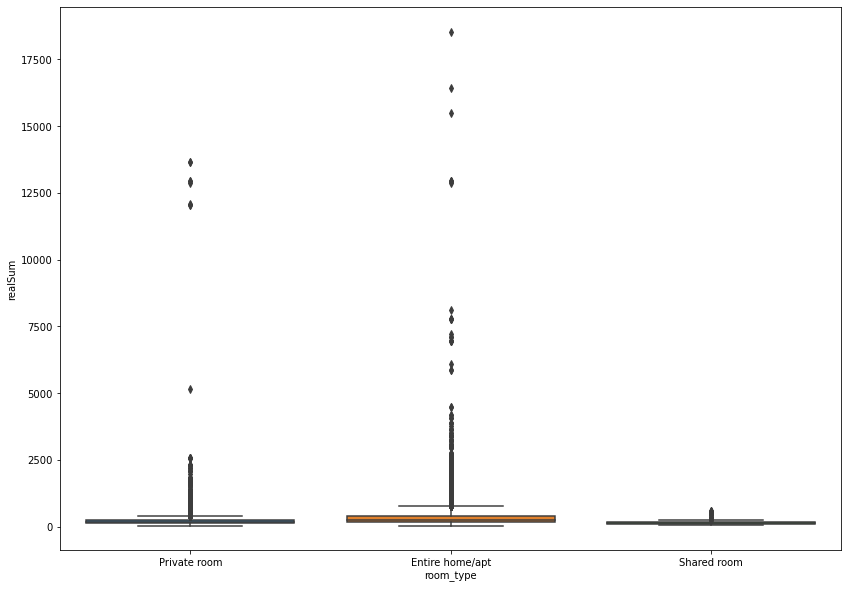

In [246]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.boxplot(x='room_type', y='realSum', data=df, ax=ax)
plt.show()

We can see we have outliers values. lets see the distribution of the prices

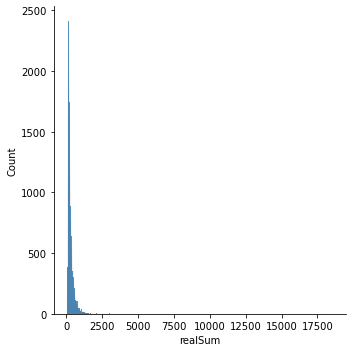

In [247]:
sns.displot(df['realSum'])

As we can see the mayority of the data is betwen 0 and 1000 aprox.

In [248]:
print('Price > 1000: ',df[df['realSum'] > 1000].shape)
print('All data: ',df.shape)

Price > 1000:  (939, 21)
All data:  (54180, 21)


Thats less than the 2% of our data. se lets change those values with the mean of the the country prices

list of the countries that has prices > 1000

In [249]:
df_temp = df[df['realSum'] > 1000]
df_temp['city'].value_counts()

london       295
amsterdam    205
paris        184
lisbon       171
barcelona     31
rome          23
berlin        17
budapest       7
athens         3
vienna         3
Name: city, dtype: int64

In [250]:
df_mean_by_country = df[['city', 'realSum']]
df_mean_by_country

,city,realSum
0,amsterdam,194.033698
1,amsterdam,344.245776
2,amsterdam,264.101422
3,amsterdam,433.529398
4,amsterdam,485.552926
...,...,...
1794,vienna,715.938574
1795,vienna,304.793960
1796,vienna,637.168969
1797,vienna,301.054157


lets see the mean prices by country

In [251]:
df_mean_by_country = df_mean_by_country.groupby(['city']).mean()
df_mean_by_country.reset_index(inplace=True)
df_mean_by_country = df_mean_by_country.sort_values('realSum', ascending=False)
df_mean_by_country

,city,realSum
0,amsterdam,573.112795
7,paris,392.531403
6,london,362.469256
5,lisbon,319.972247
2,barcelona,293.753706
3,berlin,244.583752
9,vienna,241.582484
8,rome,205.391950
4,budapest,176.513548
1,athens,151.744121


lets plot this df

<AxesSubplot:xlabel='city', ylabel='realSum'>

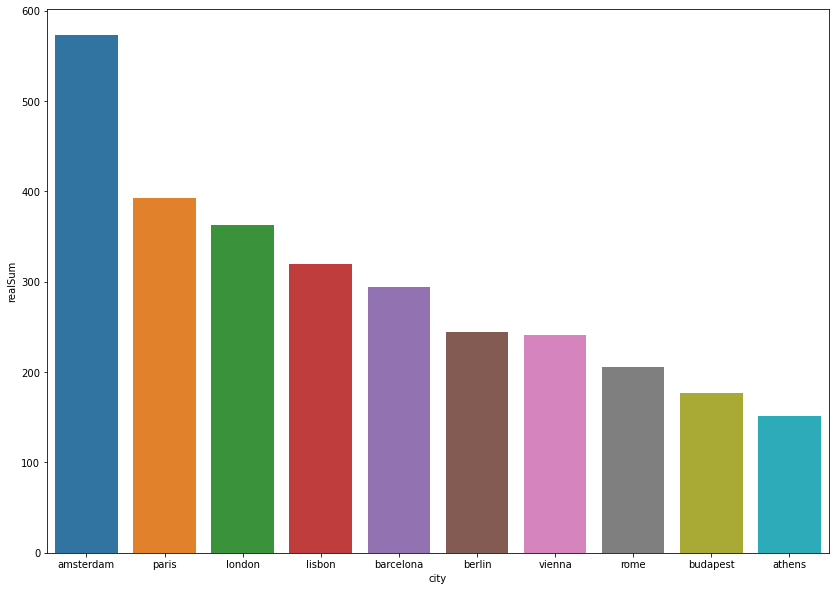

In [252]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.barplot(data=df_mean_by_country, x='city', y='realSum', ax=ax)

lets change the outliers values by the mean of the country prices

In [253]:
df.loc[(df['city'] == 'amsterdam') & (df['realSum'] > 1000), 'realSum'] = 573.112795
df.loc[(df['city'] == 'paris') & (df['realSum'] > 1000), 'realSum'] = 392.531403
df.loc[(df['city'] == 'london') & (df['realSum'] > 1000), 'realSum'] = 362.469256
df.loc[(df['city'] == 'lisbon') & (df['realSum'] > 1000), 'realSum'] = 319.972247
df.loc[(df['city'] == 'barcelona') & (df['realSum'] > 1000), 'realSum'] = 293.753706
df.loc[(df['city'] == 'berlin') & (df['realSum'] > 1000), 'realSum'] = 244.583752
df.loc[(df['city'] == 'vienna') & (df['realSum'] > 1000), 'realSum'] = 241.582484
df.loc[(df['city'] == 'rome') & (df['realSum'] > 1000), 'realSum'] = 205.391950
df.loc[(df['city'] == 'budapest') & (df['realSum'] > 1000), 'realSum'] = 176.513548
df.loc[(df['city'] == 'athens') & (df['realSum'] > 1000), 'realSum'] = 151.744121

now lets see how the distribution price looks like

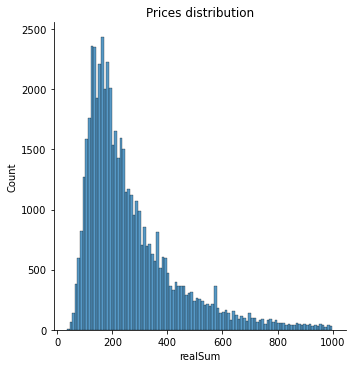

In [254]:
sns.displot(df['realSum']).set(title='Prices distribution')

now it looks much better

In [255]:
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekday
0,194.033698,Private room,FALSO,VERDADERO,2,FALSO,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,1
1,344.245776,Private room,FALSO,VERDADERO,4,FALSO,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,1
2,264.101422,Private room,FALSO,VERDADERO,2,FALSO,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,1
3,433.529398,Private room,FALSO,VERDADERO,4,FALSO,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,1
4,485.552926,Private room,FALSO,VERDADERO,2,VERDADERO,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,1


## Lets see some plots of our features

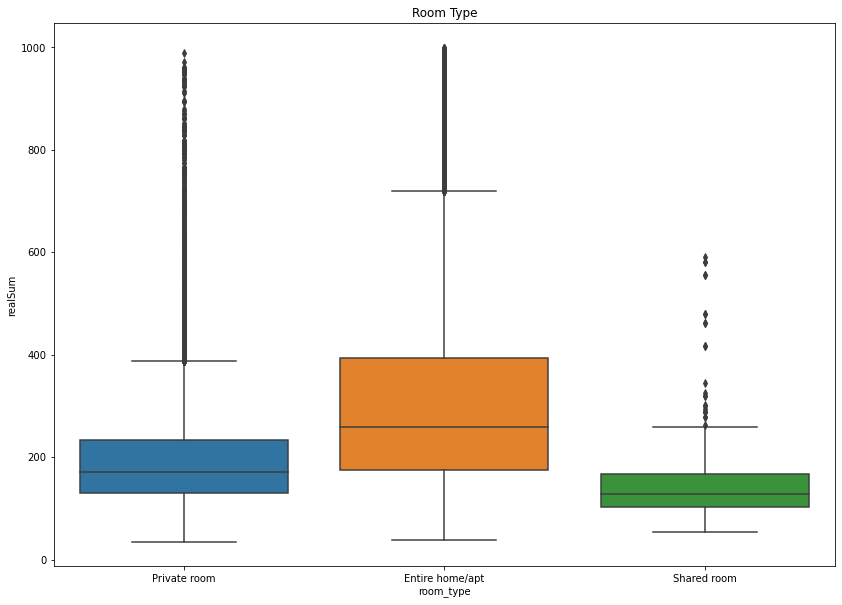

In [256]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.boxplot(x='room_type', y='realSum', data=df, ax=ax).set(title='Room Type')
plt.show()

We can see the room type "Entire Home" cost more than the others, this could be a good feature

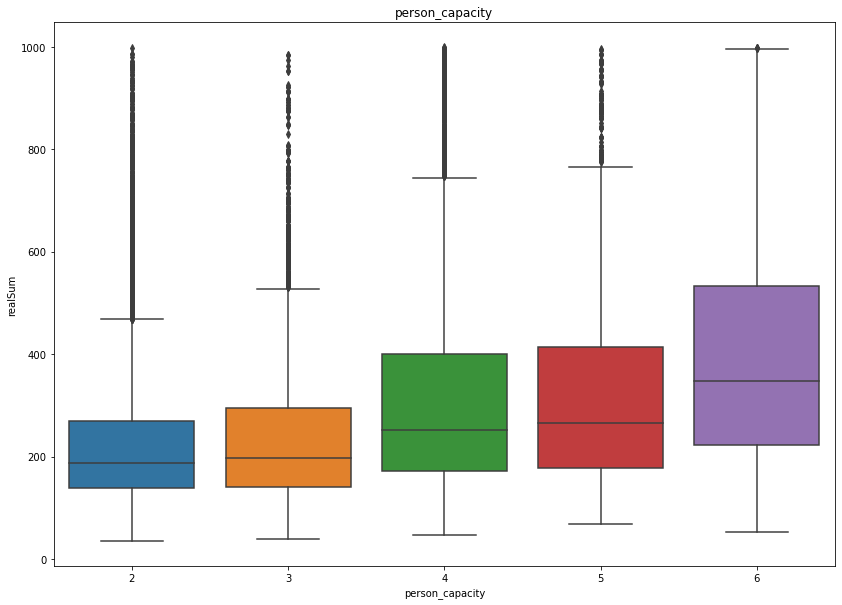

In [257]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.boxplot(x='person_capacity', y='realSum', data=df, ax=ax).set(title='person_capacity')
plt.show()

this plot shows us as that the price goes up as the capacity increment. this is a good feature to our future model

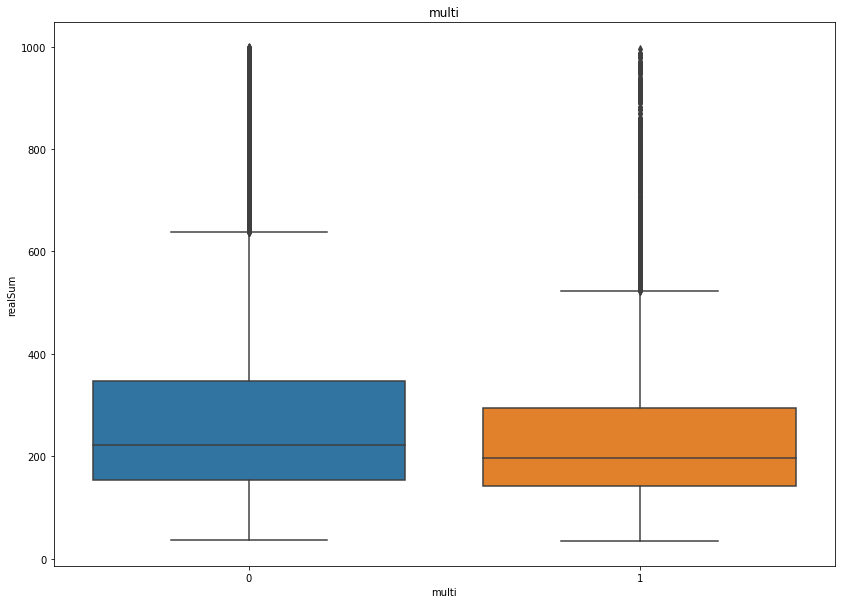

In [258]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.boxplot(x='multi', y='realSum', data=df, ax=ax).set(title='multi')
plt.show()

This feature is has not a big impact on the price

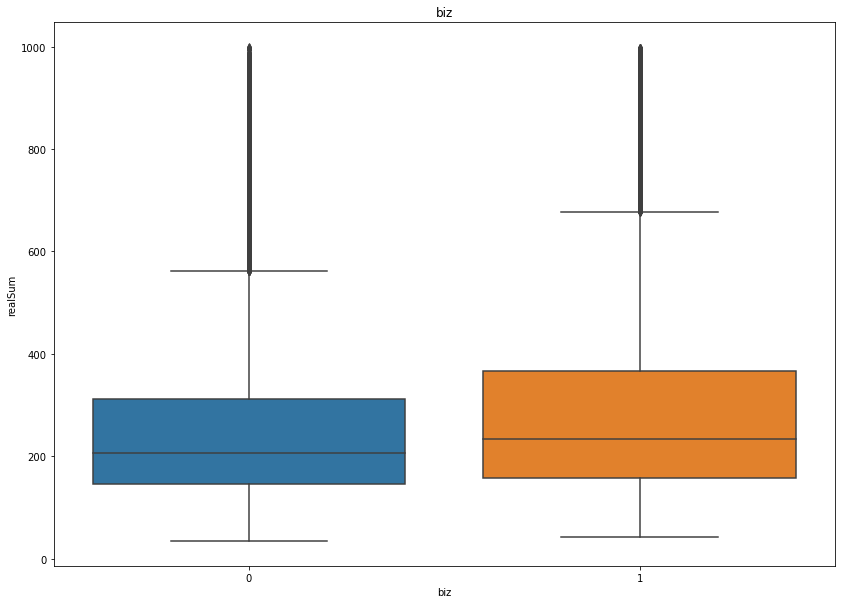

In [259]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.boxplot(x='biz', y='realSum', data=df, ax=ax).set(title='biz')
plt.show()

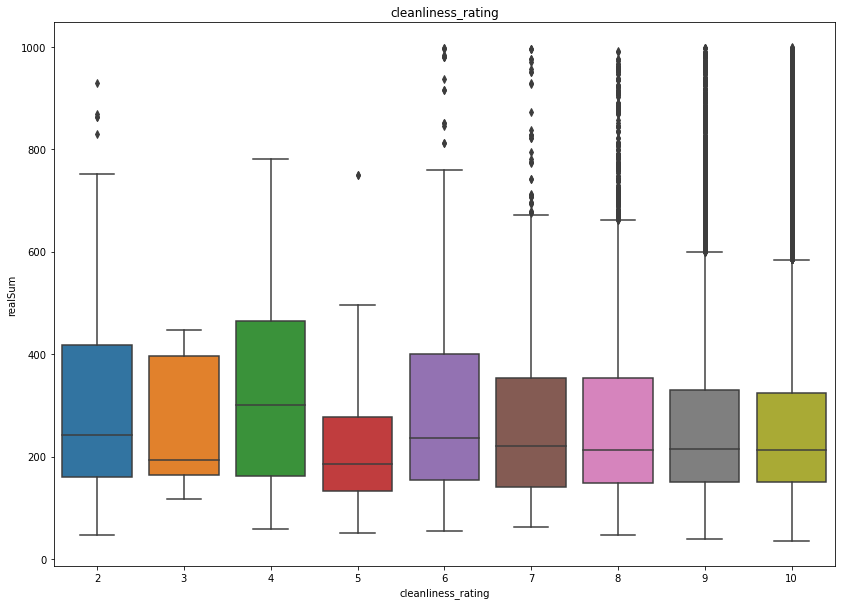

In [260]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.boxplot(x='cleanliness_rating', y='realSum', data=df, ax=ax).set(title='cleanliness_rating')
plt.show()

with this feature we cant see a clear correlation between the cleanliness rating and the price

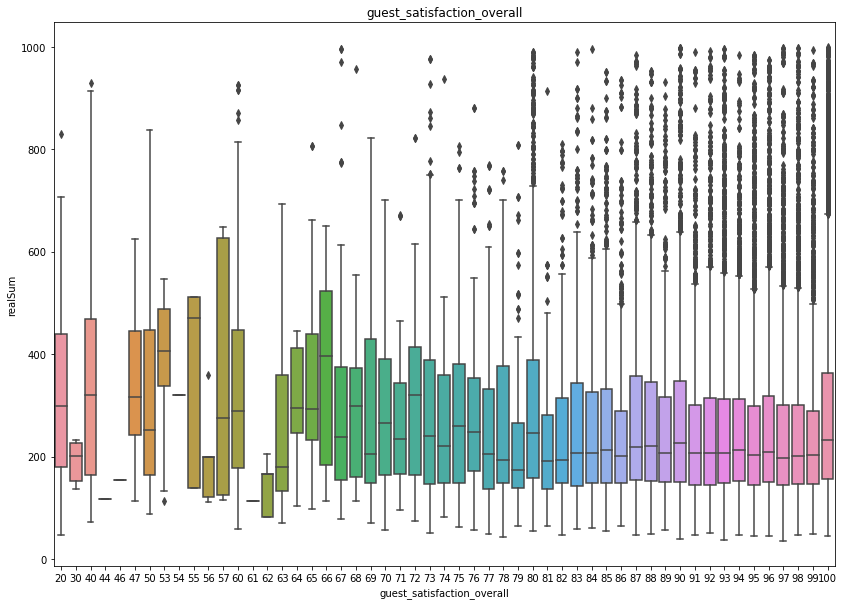

In [261]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.boxplot(x='guest_satisfaction_overall', y='realSum', data=df, ax=ax).set(title='guest_satisfaction_overall')
plt.show()

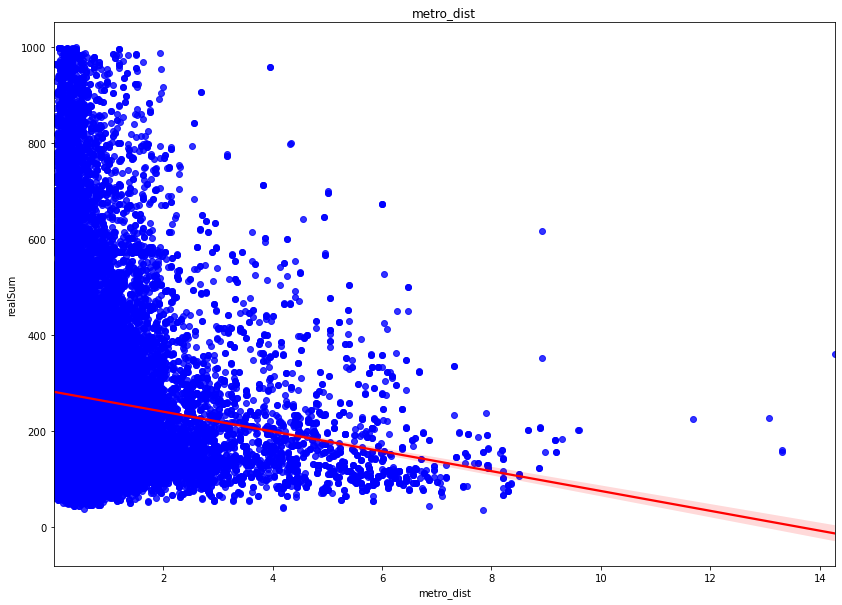

In [262]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.regplot(x='metro_dist', y='realSum', data=df, ax=ax, 
            scatter_kws={"color": "blue"}, line_kws={"color": "red"}).set(title='metro_dist')
plt.show()

here with can see metro_dist hast a negative correlation with the price, wich make sense, because the closer the place to the the metro, the more expensive the price

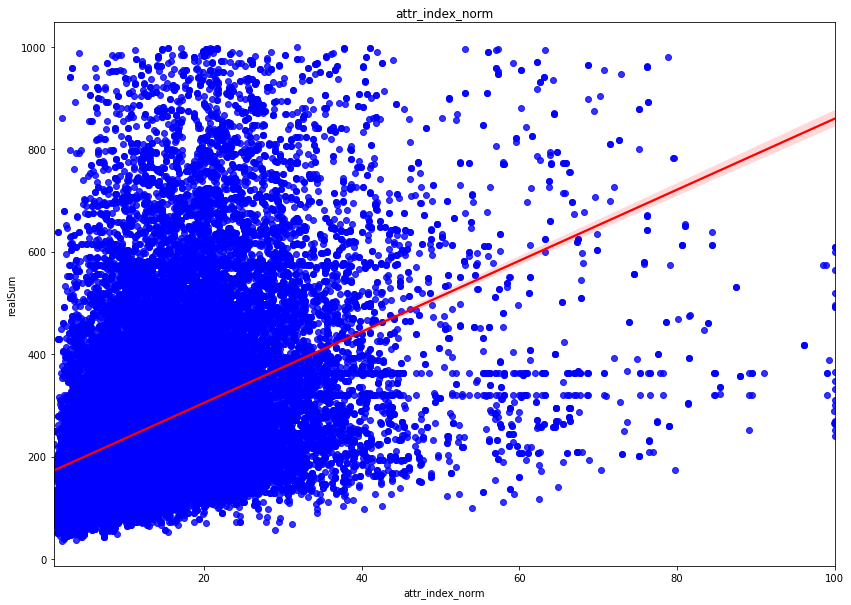

In [263]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.regplot(x='attr_index_norm', y='realSum', data=df, ax=ax, 
            scatter_kws={"color": "blue"}, line_kws={"color": "red"}).set(title='attr_index_norm')
plt.show() 

This is a good possitive correlation for our model

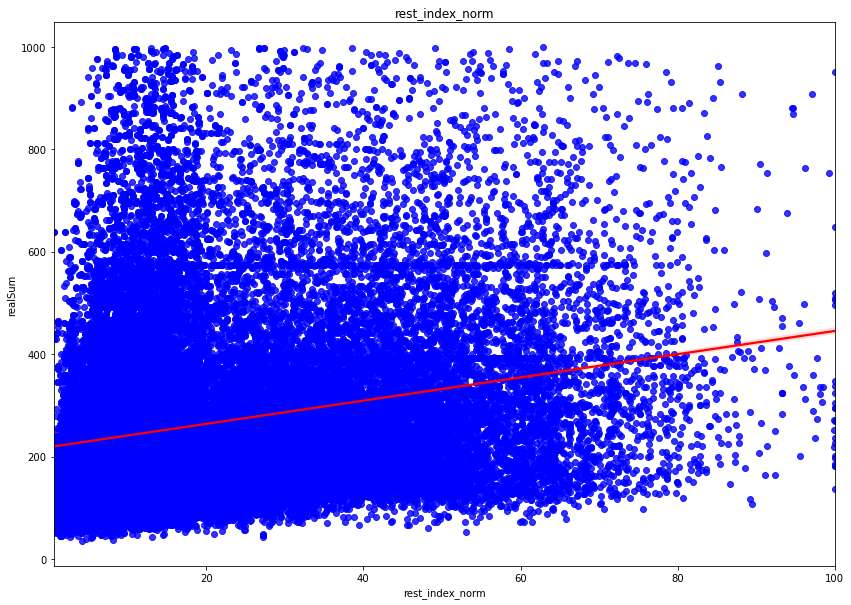

In [264]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.regplot(x='rest_index_norm', y='realSum', data=df, ax=ax, 
            scatter_kws={"color": "blue"}, line_kws={"color": "red"}).set(title='rest_index_norm')
plt.show() 

Lets see a heatmap with all correlations

<AxesSubplot:>

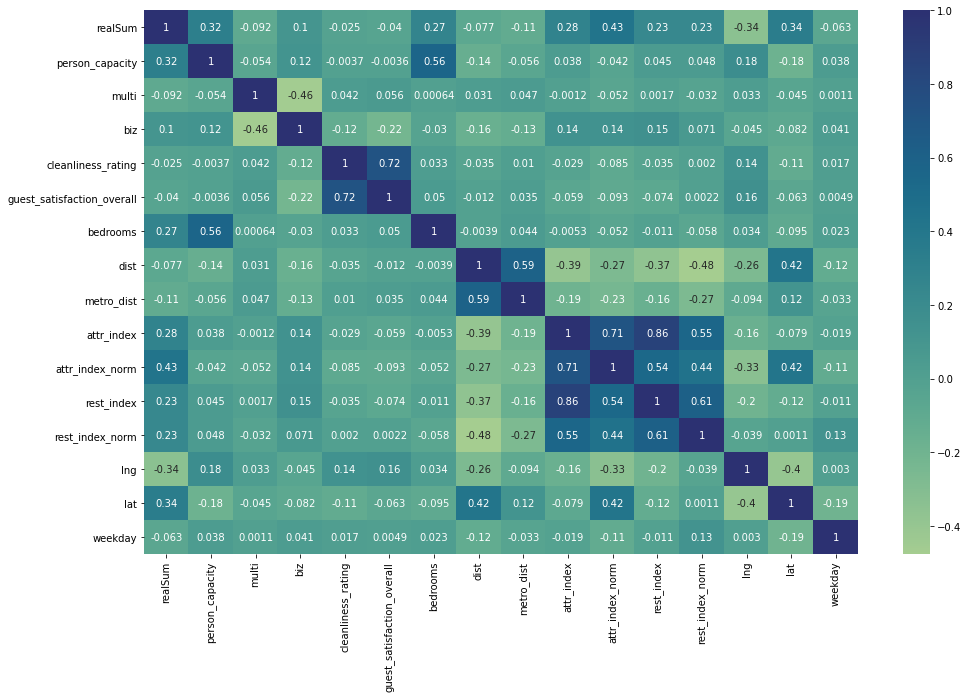

In [265]:
plt.rcParams['figure.figsize'] = (16, 10)
sns.heatmap(df.corr(), cmap='crest', annot=True)

In [266]:
df.corr()['realSum'].sort_values()

lng                          -0.341944
metro_dist                   -0.112272
multi                        -0.092088
dist                         -0.077007
weekday                      -0.063019
guest_satisfaction_overall   -0.040252
cleanliness_rating           -0.024548
biz                           0.101468
rest_index                    0.230962
rest_index_norm               0.232680
bedrooms                      0.270186
attr_index                    0.280673
person_capacity               0.321126
lat                           0.337372
attr_index_norm               0.427676
realSum                       1.000000
Name: realSum, dtype: float64

we will choose the most significant correlations

lets change the format of others columns to see if we could use them for the model

In [267]:
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekday
0,194.033698,Private room,FALSO,VERDADERO,2,FALSO,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,1
1,344.245776,Private room,FALSO,VERDADERO,4,FALSO,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,1
2,264.101422,Private room,FALSO,VERDADERO,2,FALSO,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,1
3,433.529398,Private room,FALSO,VERDADERO,4,FALSO,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,1
4,485.552926,Private room,FALSO,VERDADERO,2,VERDADERO,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,1


In [268]:
df.loc[df['room_shared'] == 'FALSO', 'room_shared'] = 0
df.loc[df['room_shared'] == 'VERDADERO', 'room_shared'] = 1

df.loc[df['room_private'] == 'FALSO', 'room_private'] = 0
df.loc[df['room_private'] == 'VERDADERO', 'room_private'] = 1

df.loc[df['host_is_superhost'] == 'FALSO', 'host_is_superhost'] = 0
df.loc[df['host_is_superhost'] == 'VERDADERO', 'host_is_superhost'] = 1

In [269]:
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekday
0,194.033698,Private room,0,1,2,0,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,1
1,344.245776,Private room,0,1,4,0,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,1
2,264.101422,Private room,0,1,2,0,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,1
3,433.529398,Private room,0,1,4,0,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,1
4,485.552926,Private room,0,1,2,1,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,1


lets transform roomtype and city as a dummy so we can use them to train the model

In [270]:
dummy_room_type = pd.get_dummies(df['room_type'])
dummy_room_type.head()

,Entire home/apt,Private room,Shared room
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [221]:
dummy_city = pd.get_dummies(df['city'])
dummy_city.head()

,amsterdam,athens,barcelona,berlin,budapest,lisbon,london,paris,rome,vienna
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [222]:
df = pd.concat([df, dummy_room_type], axis=1)

df.drop('room_type', axis=1, inplace = True)

In [223]:
df = pd.concat([df, dummy_city], axis=1)

df.drop('city', axis=1, inplace = True)

In [224]:
df.head()

,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekday,Entire home/apt,Private room,Shared room,amsterdam,athens,barcelona,berlin,budapest,lisbon,london,paris,rome,vienna
0,194.033698,0,1,2,0,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,1,0,1,0,1,0,0,0,0,0,0,0,0,0
1,344.245776,0,1,4,0,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,1,0,1,0,1,0,0,0,0,0,0,0,0,0
2,264.101422,0,1,2,0,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,1,0,1,0,1,0,0,0,0,0,0,0,0,0
3,433.529398,0,1,4,0,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,1,0,1,0,1,0,0,0,0,0,0,0,0,0
4,485.552926,0,1,2,1,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,1,0,1,0,1,0,0,0,0,0,0,0,0,0


now lets see the correlation with the new features

In [44]:
df.corr()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekday,Entire home/apt,Private room,Shared room,amsterdam,athens,barcelona,berlin,budapest,lisbon,london,paris,rome,vienna
realSum,1.000000,0.321126,-0.092088,0.101468,-0.024548,-0.040252,0.270186,-0.077007,-0.112272,0.280673,0.427676,0.230962,0.232680,-0.341944,0.337372,-0.063019,0.320813,-0.312513,-0.056184,0.261266,-0.233003,0.005646,-0.045504,-0.158728,0.058386,0.144493,0.212803,-0.172181,-0.056955
person_capacity,0.321126,1.000000,-0.054135,0.123185,-0.003739,-0.003570,0.561729,-0.142050,-0.055630,0.037719,-0.041979,0.044682,0.048412,0.183135,-0.177365,0.038159,0.497583,-0.503568,0.026610,-0.052678,0.145906,-0.091870,-0.058938,0.091331,-0.028706,-0.101703,-0.049115,0.080883,0.046363
multi,-0.092088,-0.054135,1.000000,-0.460326,0.042304,0.055522,0.000640,0.030556,0.046750,-0.001166,-0.051693,0.001660,-0.031712,0.033232,-0.045232,0.001087,-0.136442,0.139521,-0.015968,-0.004316,-0.018468,0.047531,-0.008109,0.006425,-0.025209,-0.018820,-0.060607,0.091311,-0.008103
biz,0.101468,0.123185,-0.460326,1.000000,-0.119069,-0.218833,-0.030049,-0.158409,-0.127631,0.139956,0.135989,0.154922,0.071454,-0.044548,-0.081906,0.040712,0.046038,-0.052545,0.038365,-0.098409,0.028897,-0.006388,-0.075795,0.006293,0.089272,0.049808,-0.073368,-0.003977,0.000849
cleanliness_rating,-0.024548,-0.003739,0.042304,-0.119069,1.000000,0.719687,0.033247,-0.034674,0.010116,-0.028745,-0.084982,-0.034963,0.002014,0.136468,-0.108393,0.016787,0.032028,-0.026483,-0.034060,0.019205,0.089493,-0.019232,0.020149,0.030545,-0.051586,-0.095531,-0.041438,0.065263,0.027174
guest_satisfaction_overall,-0.040252,-0.003570,0.055522,-0.218833,0.719687,1.000000,0.049528,-0.011775,0.034678,-0.058541,-0.093457,-0.073739,0.002187,0.155797,-0.063314,0.004912,0.026027,-0.022595,-0.021200,0.042897,0.088012,-0.036486,0.042517,0.062974,-0.072393,-0.097815,-0.020432,0.028358,0.034244
bedrooms,0.270186,0.561729,0.000640,-0.030049,0.033247,0.049528,1.000000,-0.003862,0.043767,-0.005285,-0.052375,-0.010593,-0.058092,0.034085,-0.094511,0.022871,0.161942,-0.159170,-0.019811,0.045830,0.064238,0.004018,-0.028524,-0.020689,0.023938,-0.016927,-0.108219,0.057236,-0.020731
dist,-0.077007,-0.142050,0.030556,-0.158409,-0.034674,-0.011775,-0.003862,1.000000,0.591169,-0.394624,-0.266905,-0.365182,-0.476287,-0.263112,0.418077,-0.115490,-0.231852,0.230206,0.014353,-0.051120,-0.217544,-0.126201,0.155809,-0.179629,0.116296,0.351127,-0.070539,-0.078509,-0.034586
metro_dist,-0.112272,-0.055630,0.046750,-0.127631,0.010116,0.034678,0.043767,0.591169,1.000000,-0.191663,-0.230047,-0.158667,-0.267356,-0.093851,0.118107,-0.033007,-0.129903,0.129576,0.004449,0.082900,-0.084752,-0.070263,0.029775,-0.052632,0.091030,0.153392,-0.200697,0.052721,-0.054183
attr_index,0.280673,0.037719,-0.001166,0.139956,-0.028745,-0.058541,-0.005285,-0.394624,-0.191663,1.000000,0.712736,0.856071,0.550832,-0.164675,-0.078800,-0.018792,0.033832,-0.029238,-0.028353,-0.026131,-0.215360,0.171614,-0.185121,-0.109053,-0.054074,-0.005815,0.128181,0.346387,-0.208778


In [45]:
df.corr()['realSum'].sort_values()

lng                          -0.341944
Private room                 -0.312513
athens                       -0.233003
rome                         -0.172181
budapest                     -0.158728
metro_dist                   -0.112272
multi                        -0.092088
dist                         -0.077007
weekday                      -0.063019
vienna                       -0.056955
Shared room                  -0.056184
berlin                       -0.045504
guest_satisfaction_overall   -0.040252
cleanliness_rating           -0.024548
barcelona                     0.005646
lisbon                        0.058386
biz                           0.101468
london                        0.144493
paris                         0.212803
rest_index                    0.230962
rest_index_norm               0.232680
amsterdam                     0.261266
bedrooms                      0.270186
attr_index                    0.280673
Entire home/apt               0.320813
person_capacity          

We will be using the following features:

'attr_index_norm', 'lat', 'person_capacity', 'Entire home/apt', 'Entire home/apt', 'bedrooms','amsterdam', 'rest_index_norm', 'paris', 'london', 'biz', 'lng', 'Private room', 'athens', 'rome', 'budapest', 'metro_dist'

# Model Development

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

### Simple linear regression

In [47]:
X = df[['attr_index_norm']] #features
Y = df[['realSum']] #target

#Model creation
lm = LinearRegression()

lm.fit(X, Y) #Model fiting
lm.score(X, Y)

0.18290650523330254

As we can see the score tell us this dont perform very well

(0.0, 1047.4490442055)

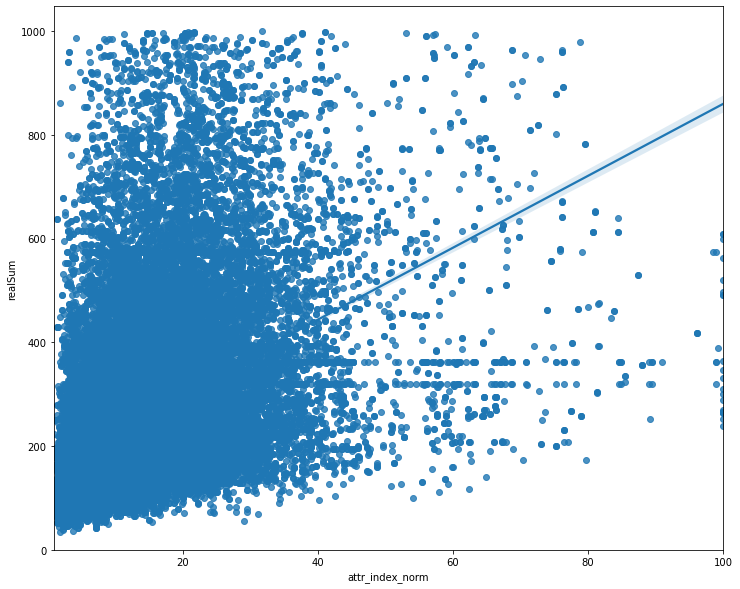

In [48]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="attr_index_norm", y="realSum", data=df)
plt.ylim(0,)

### Multiple Lineal Regression

In [49]:
features = ['attr_index_norm', 'lat', 'person_capacity', 'Entire home/apt', 'Entire home/apt', 'bedrooms','amsterdam', 'rest_index_norm', 'paris', 'london', 'biz', 'lng', 'Private room', 'athens', 'rome', 'budapest', 'metro_dist']

In [50]:
#Model creation
lm2 = LinearRegression()

#Model fiting
lm2.fit(df[features], df['realSum'])


LinearRegression()

In [53]:
lm2.score(df[features], df['realSum'])

0.5640126873998176

lets visualize the model

In [54]:
Y_hat = lm2.predict(df[features])

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


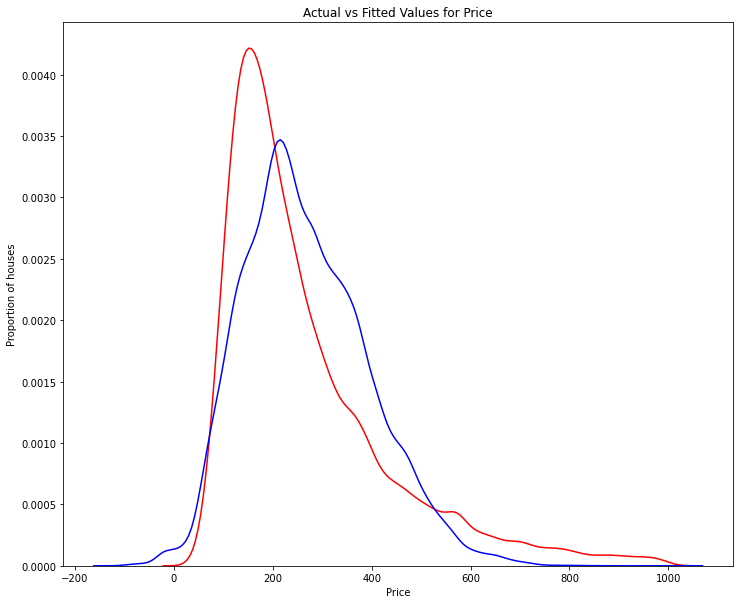

In [55]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['realSum'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of houses')

plt.show()
plt.close()

This Model perform better than the previous one but I think it could be better, lets try applying Polynomial features

# Polynomial feature

In [56]:
#Polynomial object creation
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [57]:
# Pipeline creation
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [58]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [59]:
#Model training
Z = df[features].astype(float)
pipe.fit(Z, df['realSum'])

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [60]:
pipe.score(Z, df['realSum'])

0.6447920357717769

This one perform a little bit better, lets visualize it

In [61]:
def plot_poly(actual_value, predicted_value):
    plt.figure(figsize=(width, height))


    ax1 = sns.distplot(actual_value, hist=False, color="r", label="Actual Value")
    sns.distplot(predicted_value, hist=False, color="b", label="Fitted Values" , ax=ax1)


    plt.title('Actual vs Fitted Values for Price')
    plt.xlabel('Price')
    plt.ylabel('Proportion of houses')

    return plt.show()


In [62]:
ypipe = pipe.predict(Z)


C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


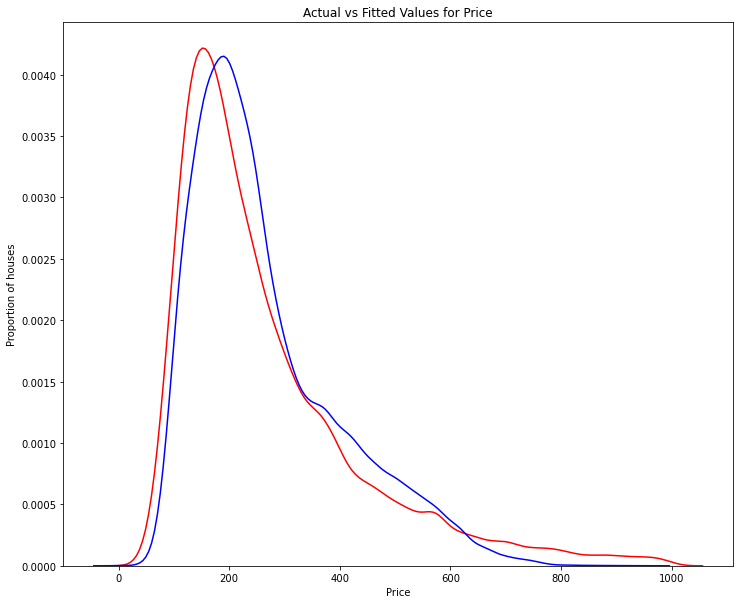

In [63]:
plot_poly(df['realSum'], ypipe)

# Model evaluation

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [65]:
features = ['attr_index_norm', 'lat', 'person_capacity', 'Entire home/apt', 'Entire home/apt', 'bedrooms','amsterdam', 'rest_index_norm', 'paris', 'london', 'biz', 'lng', 'Private room', 'athens', 'rome', 'budapest', 'metro_dist']

In [66]:
X = df[features]
Y = df['realSum']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 10836
number of training samples: 43344


In [67]:
from sklearn.linear_model import Ridge

In [68]:
RigeModel = Ridge(alpha=0.1)

In [69]:
RigeModel.fit(x_train, y_train)

Ridge(alpha=0.1)

In [70]:
RigeModel.score(x_test, y_test)

0.5656941890318021

As we can see it does not perform too well with the test data, lets apply polynomial transformation to see if it perform better

In [71]:
#Polynomial object creation
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [72]:
Pol_train_data = pr.fit_transform(x_train) #train data tranformation
Pol_test_data = pr.fit_transform(x_test) #test data tranformation

In [73]:
RigeModel1 = Ridge(alpha=0.1)

In [74]:
RigeModel1.fit(Pol_train_data, y_train)

Ridge(alpha=0.1)

In [75]:
RigeModel1.score(Pol_test_data, y_test)

0.6447557933065028

As we can see it performs better applying polynomial tranformation. Now lets find the best estimator for the alpha value, to see if we can improve the model

# Grid search

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [78]:
RR=Ridge()
RR

Ridge()

In [79]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [80]:
Grid1.fit(Pol_train_data, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [81]:
BestRR= Grid1.best_estimator_
BestRR

Ridge(alpha=0.001)

In [82]:
BestRR.score(Pol_test_data, y_test)

0.6452530900551312

In [ ]:
It perform a little bit better, but no a significan improve. lets try with another Model

# Random Forest Regression

In [83]:
from sklearn.ensemble import RandomForestRegressor
X = df[features]
Y = df['realSum']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

scaler = StandardScaler()

In [84]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [85]:
forest = RandomForestRegressor()
forest

RandomForestRegressor()

In [86]:
forest.fit(x_train_scaled, y_train)

RandomForestRegressor()

In [87]:
forest.score(x_test_scaled, y_test)

0.8319265951794633

As we can see this model perform so much better, lets visualize it

In [88]:
y_pred = forest.predict(x_test_scaled)

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


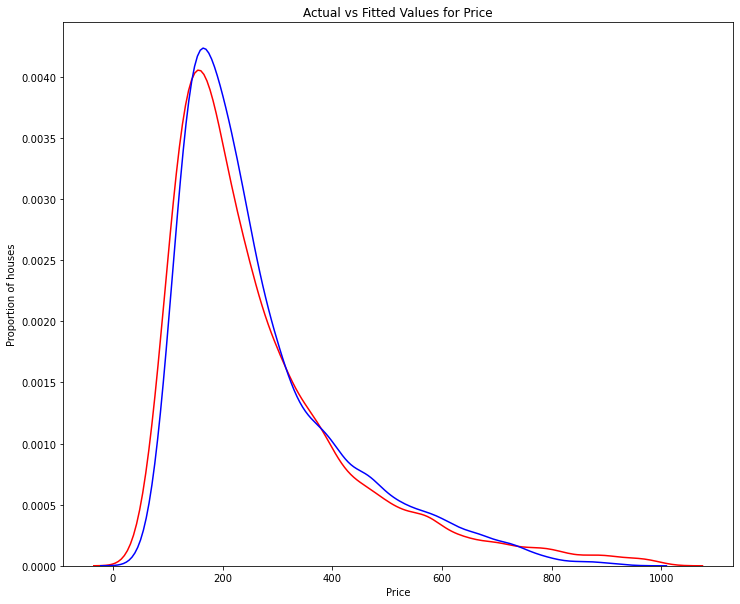

In [89]:
plot_poly(y_test, y_pred)

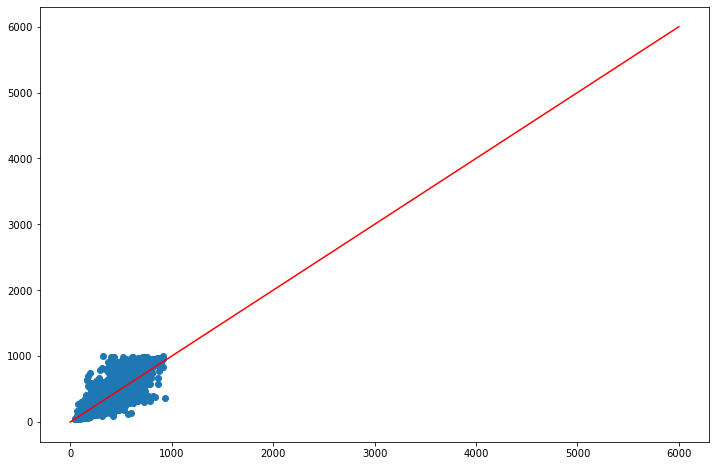

In [90]:
plt.figure(figsize=(12,8))
plt.scatter(y_pred, y_test)
plt.plot(range(0,6000), range(0, 6000), c='red')

# Conclusion


<p>
After a long process we finally managed to develop a model that although it is not perfect it works very well. We were also able to see very interesting information about Airbnb prices in European cities, for example Amsterdam is the city with the most expensive average, while Athens is the least expensive. 

One of the challenges with this dataset was to deal with out of range values, but a good solution was found. We can conclude that although linear regression is a basic machine learning concept, it is still very powerful.

</p>